# 项目：研究票房高的电影具有的特点

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

我们从Kaggle获取了从1960年到2015年之间的1万多部电影的TMBd数据， 这包括电影的受欢迎度（popularity），预算（budget），票房（revenue），导演（director），演职人员（cast），电影类型（genres）等。在这篇报告中，我们想要从3个方面来探索票房（revenue）高的电影所具有的特点。第一，票房与预算之间的关系，高预算能否保证电影的高票房。第二，TMDb的评分与票房之间的关系，是不是高票房的电影就会有更好的评分。第三，电影类型与票房之间的关系，特定类型的电影是否更容易获得高票房。


In [342]:
# 用这个框对你计划使用的所有数据包设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## 数据整理
### 常规属性

In [343]:
# 加载数据并打印几行。进行几项操作，检查数据
#   类型，以及是否有缺失数据或错误数据。
movies= pd.read_csv('data/tmdb-movies.csv')
# 检查数据的完整性，是否有数据的缺失
movies.info()
# 打印出前5部电脑，了解每项数据的数据格式
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


从上面可以看到，我们的数据集中一共有10866部电影，每部电影共有21个属性，在这里有一些数据我们是不关心的，这包括：id，imdb_id，homepage，tagline，keywords，runtime，production_companies，release_date, release_year， 这些列将会在我们的数据清理阶段被剔除出去。

#### 数据类型

In [344]:
# 检查我们关心的属性的列的是数据类型
report_colums = ['budget_adj','revenue_adj','vote_average','genres']
for element in report_colums:
    print("Column: {} \t\t {}。".format(element,movies[element].dtype))   

Column: budget_adj 		 float64。
Column: revenue_adj 		 float64。
Column: vote_average 		 float64。
Column: genres 		 object。


从这里看到，我们关心的数据中，通货膨胀预算（budget_adj），通货膨胀票房（revenue_adj）和投票（vote_average）列的数据类型是浮点型，这是正是我们需要的正确类型。对于电影类别（genres），它的值是有多个电影类别通过‘|’连接起来的。

#### 重复数据

In [345]:
#检查是否有重复的数据
print("共有{}条数据重复，请看下面的列表：".format(sum(movies.duplicated())))
movies[movies.duplicated(keep=False)]

共有1条数据重复，请看下面的列表：


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### 通胀预算

In [346]:
# 定义function，用来查找制定数字或者浮点类型的列中，是否有0或者控制出现。
def findZeroOrNull(df, columName):
    return (df[columName] ==0 ) | (df[columName].isnull())

movies_zero_budget = findZeroOrNull(movies, 'budget_adj')
#  打印出调查结果
print("共有{}部电影数据的通胀预算为零或为空值.下面列出了其中的5项：".format(movies_zero_budget.sum())) 
movies[movies_zero_budget].head()

共有5696部电影数据的通胀预算为零或为空值.下面列出了其中的5项：


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


#### 通货膨胀票房

In [347]:
# 找出通货膨胀票房列中的0或者空值
movies_zero_revenue = findZeroOrNull(movies, 'revenue_adj' )
print("共有{}部电影数据的通胀预算为零.下面列出了其中的5项：".format(movies_zero_revenue.sum())) 
movies[movies_zero_revenue].head()

共有6016部电影数据的通胀预算为零.下面列出了其中的5项：


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0


In [348]:
# 查找出类别为空，或者未定义的电影。
movies_no_genres = movies.genres.isnull()
print("共有{}部电影数据没有分配相应的类别（genres）.下面列出了其中的5项：".format(movies_no_genres.sum())) 
movies[movies_no_genres].head()

共有23部电影数据没有分配相应的类别（genres）.下面列出了其中的5项：


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.0,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.0,0.0


In [349]:
# 找出TMDb评分为0分的电影
movies_no_vote = findZeroOrNull(movies, 'vote_average')
print("共有{}部电影数据没有TMDb评分.下面列出了其中的5项：".format(movies_no_vote.sum())) 
movies[movies_no_vote].head()

共有0部电影数据没有TMDb评分.下面列出了其中的5项：


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### 数据清理
下面我们将要根据上面的的调查来清理数据，需要做的事情有：
1. 去掉不需要的列
2. 去掉重复的数据行
3. 去掉通货膨胀预算或者通过膨胀票房为空的电影
4. 将电影的类别拆分出来，每一个类别变成一列，值的类型为布尔值。
5. 为没有定义类别的电影添加值：‘Unknown‘


In [350]:
# 去掉不需要的列
movies_clean = movies.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date','vote_count', 'release_year'], axis=1)
# 检查留下的列是否正确。
movies_clean.head()

,original_title,genres,vote_average,budget_adj,revenue_adj
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08
2,Insurgent,Adventure|Science Fiction|Thriller,6.3,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,1.839999e+08,1.902723e+09
4,Furious 7,Action|Crime|Thriller,7.3,1.747999e+08,1.385749e+09


In [351]:
#打印当前的数据维度，作为后续操作的基准
movies_clean.shape

(10866, 5)

In [352]:
#  在清除重复数据，确保有重复数据。
sum(movies_clean.duplicated())

1

In [353]:
# 去掉重复数据项，并且检查是否还有重复项。
movies_clean.drop_duplicates(inplace=True)
sum(movies_clean.duplicated())

0

In [354]:
#  将通胀预算是0 的电影清除出去。
movies_clean = movies_clean[movies_clean.budget_adj!= 0]
# 确认预算为0或者空值的数据已经被清除。
sum(findZeroOrNull(movies_clean, 'budget_adj'))

0

In [355]:
# 将通胀票房是0 的电影清除出去。
movies_clean = movies_clean[movies_clean.revenue_adj!= 0]
# 确认预算为0或者空值的数据已经被清除。
sum(findZeroOrNull(movies_clean, 'revenue_adj'))

0

In [356]:
# 尽管我们之前没有找到分类为空的电影，
# 但是为了处理的完整性，我们依然会执行清除命令
movies_clean = movies_clean[movies_clean.genres.notnull()]
# 再次确认没有分类为空值的电影。
sum(movies_clean.genres.isnull())

0

下面我们准备将电影分类中的值，按照‘|’分隔开，并且添加新的列到前面的清理完成的矩阵上，列名将是我们分割出来的电影分类，列的数据类型是数字型，范围为0或者1。

In [357]:
# 首先获得所有的电影类型集
all_genres = []
for genres_element in movies_clean.genres:
    all_genres.extend(genres_element.split('|'))

# 检查我们收集到的电影类别。
all_genres = pd.unique(all_genres)
all_genres

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [358]:
# 生成一个矩阵，长为电影的总数，宽为所有类别的总数
zero_matrix = np.zeros((len(movies_clean),len(all_genres)))

# 因为 movies_clean 已经去掉了一些电影数据，所以index是不连续的，
# 因此我们需要明确使用movies_clean的index到genres_matrix中， 以方便我们后面两个矩阵的合并。
genres_matrix = pd.DataFrame(zero_matrix,columns=all_genres, index =movies_clean.index)

# 按照为分割的电影类别将相应的列中的值变为1
for i, genres_elm in enumerate(movies_clean.genres) :
    index_array = genres_matrix.columns.get_indexer(genres_elm.split('|'))
    genres_matrix.iloc[i,index_array] = 1

# 打印出前5列，检查是否按照原生的电影类别的值正确填充了值到相应的列中
genres_matrix.head()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [359]:
# 检查最后5列的数据的index 和数据有被正确填充。
genres_matrix.tail()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
10822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10828,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10829,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10835,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10848,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [360]:
# 将 genres_matrix 与 movies_clean 合并起来。
# 因为我们前面明确指定了 genres_matrix 的index 为 movies_clean的index，Dataframe就可以正确的将他们对应起来。
movies_genres = movies_clean.join(genres_matrix)

# 检查合并后的矩阵
movies_genres.head()

,original_title,genres,vote_average,budget_adj,revenue_adj,Action,Adventure,Science Fiction,Thriller,Fantasy,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Insurgent,Adventure|Science Fiction|Thriller,6.3,1.012000e+08,2.716190e+08,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,1.839999e+08,1.902723e+09,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Furious 7,Action|Crime|Thriller,7.3,1.747999e+08,1.385749e+09,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [361]:
# 检查一些数据列是否被正确的合并了， 没有引入其他的错误。
movies_genres.describe()

,vote_average,budget_adj,revenue_adj,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,...,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000
mean,6.168163,4.423999e+07,1.370647e+08,0.281526,0.194344,0.134665,0.312403,0.102750,0.168915,0.013492,...,0.352361,0.089258,0.173067,0.030877,0.033472,0.035288,0.120135,0.009081,0.003373,0.000259
std,0.794920,4.480925e+07,2.161114e+08,0.449802,0.395746,0.341410,0.463533,0.303672,0.374726,0.115386,...,0.477768,0.285153,0.378354,0.173007,0.179888,0.184531,0.325161,0.094875,0.057988,0.016108
min,2.200000,9.693980e-01,2.370705e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,1.309053e+07,1.835735e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.200000,3.001611e+07,6.173068e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.700000,6.061307e+07,1.632577e+08,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.400000,4.250000e+08,2.827124e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [362]:
# 检查后部的数据。
movies_genres.tail()

,original_title,genres,vote_average,budget_adj,revenue_adj,Action,Adventure,Science Fiction,Thriller,Fantasy,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
10822,Who's Afraid of Virginia Woolf?,Drama,7.5,5.038511e+07,2.266436e+08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10828,Torn Curtain,Mystery|Thriller,6.3,2.015404e+07,8.733419e+07,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10829,El Dorado,Action|Western,6.9,3.125892e+07,4.030809e+07,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10835,The Sand Pebbles,Action|Adventure|Drama|War|Romance,7.0,8.061618e+07,1.343603e+08,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10848,Fantastic Voyage,Adventure|Science Fiction,6.7,3.436265e+07,8.061618e+07,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='eda'></a>
## 探索性数据分析

### 预算与票房的关系
在这一部分，我们想要探索预算和最后的票房之间的关系， 我们会考虑如下问题：
1. 预算和票房之间有关系么？
2. 预算和票房是线性的关系么？

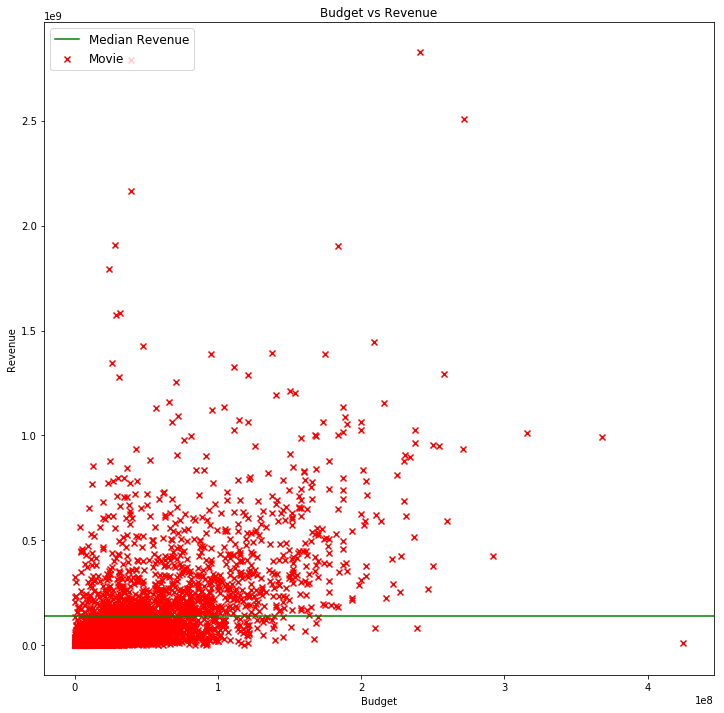

In [363]:
# 绘制预算与票房的散点图。
def plotScatter(x,y,title,xlabel,ylabel,legend):
    fig = plt.figure(figsize=(12, 12))  
    ax1 = fig.add_subplot(111)  
    #设置标题  
    ax1.set_title(title)  
    plt.axhline(y= revenue_median_fig['value'],color=revenue_median_fig['color'],label=revenue_median_fig['label'])
    #设置X轴标签  
    plt.xlabel(xlabel)
    #设置Y轴标签  
    plt.ylabel(ylabel)
    #画散点图  
    ax1.scatter(x, y, c='r',marker='x', label=legend)  
    #设置图标  
    plt.legend( loc='upper left', prop={'size': 12})
    #显示所画的图  
    plt.show()
revenue_median = movies_genres.revenue_adj.mean()
revenue_median_fig = {'label':'Median Revenue',  'value':revenue_median, 'color':'green'}
plotScatter(movies_genres.budget_adj, movies_genres.revenue_adj,'Budget vs Revenue','Budget','Revenue','Movie')

从上面的散点图我们可以看到，总体上预算和票房并没有呈现出线性关系。从图中可以看到，如果我们认为高于票房中位值的电影为高票房的话，那么不管是低预算还是高预算都有高票房电影出现。

In [364]:
# 在这里我们想要将预算按照他的分布来定义出不同的预算水平。
movies_genres['budget_adj'].describe()

count    3.854000e+03
mean     4.423999e+07
std      4.480925e+07
min      9.693980e-01
25%      1.309053e+07
50%      3.001611e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [373]:
# 对用于把数据“分割”成组的边缘进行分组
bin_edges = [ 9.693980e-01, 1.309053e+07, 3.001611e+07, 6.061307e+07, 4.250000e+08] # 用刚才计算的五个值填充这个列表
# 四个预算水平组的标签
bin_names = [ 'Low','Medium','Moderately High','High'] 

column_index = 5
# 添加新的预算水平列（budget_levels）到movies_genres矩阵中。
movies_genres['budget_levels'] = pd.cut(movies_genres['budget_adj'], bin_edges, labels=bin_names)

In [374]:
movies_genres.head()

,original_title,genres,vote_average,budget_adj,revenue_adj,Action,Adventure,Science Fiction,Thriller,Fantasy,...,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie,budget_level,budget_levels
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,Insurgent,Adventure|Science Fiction|Thriller,6.3,1.012000e+08,2.716190e+08,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,1.839999e+08,1.902723e+09,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
4,Furious 7,Action|Crime|Thriller,7.3,1.747999e+08,1.385749e+09,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High


In [375]:
# 检查尾部的数据
movies_genres.tail()

,original_title,genres,vote_average,budget_adj,revenue_adj,Action,Adventure,Science Fiction,Thriller,Fantasy,...,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie,budget_level,budget_levels
10822,Who's Afraid of Virginia Woolf?,Drama,7.5,5.038511e+07,2.266436e+08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Moderately High,Moderately High
10828,Torn Curtain,Mystery|Thriller,6.3,2.015404e+07,8.733419e+07,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Medium
10829,El Dorado,Action|Western,6.9,3.125892e+07,4.030809e+07,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Moderately High,Moderately High
10835,The Sand Pebbles,Action|Adventure|Drama|War|Romance,7.0,8.061618e+07,1.343603e+08,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
10848,Fantastic Voyage,Adventure|Science Fiction,6.7,3.436265e+07,8.061618e+07,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Moderately High,Moderately High


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


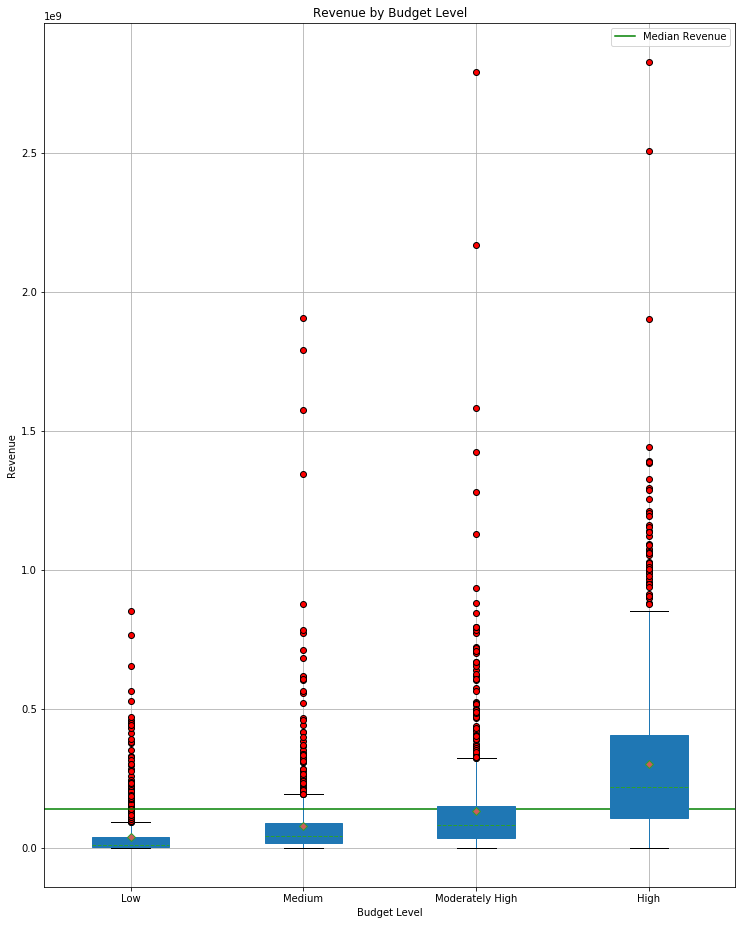

In [376]:
def plotBox(df, column_to_draw, group_by,xlabel,ylabel,title):
    # 按照预算水平来画出每个预算水平组的箱型图
    ax = df.boxplot(column=column_to_draw, by=group_by, figsize=(12,16),
                                patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
                                showmeans=True, # 以点的形式显示均值
                                boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
                                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
                                meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
                                medianprops = {'linestyle':'--','color':'orange'})
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    green_line = mlines.Line2D([], [], color=revenue_median_fig['color'], label=revenue_median_fig['label'])
    plt.axhline(y= revenue_median_fig['value'],color=revenue_median_fig['color'],label=revenue_median_fig['label'])
    plt.legend(handles=[green_line])
    plt.suptitle("")

# 按照预算水平来画出每个预算水平组的箱型图
plotBox(movies_genres,'revenue_adj','budget_levels','Budget Level','Revenue','Revenue by Budget Level')

从预算水平和票房的箱型图中我们可以观察到预算和票房的平均水平是正比的关系。从预算水平来看，更高的预算水平会有更多的电影获得较高的票房，而较低的预算的电影依然是有机会获得高票房的。

### TMDb的评分与票房的关系

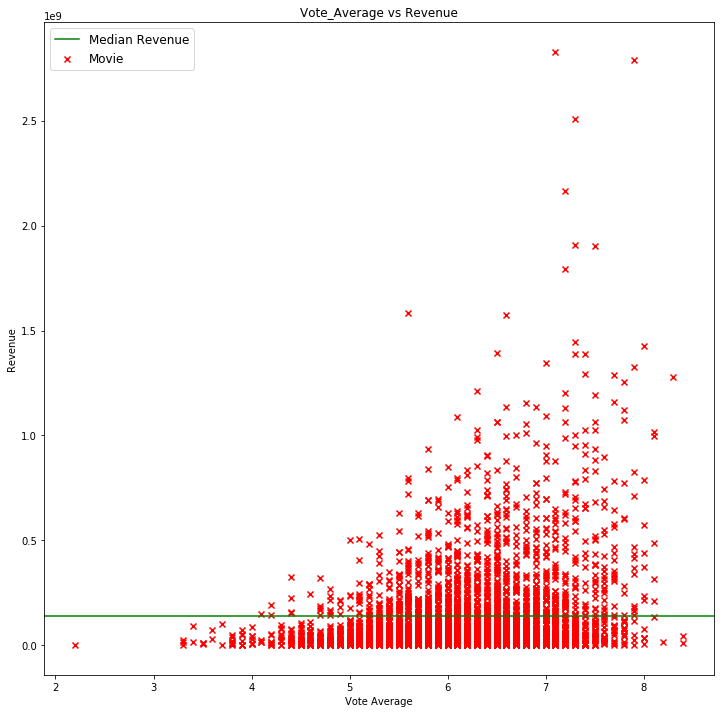

In [377]:
plotScatter(movies_genres.vote_average, movies_genres.revenue_adj,'Vote_Average vs Revenue','Vote Average','Revenue','Movie')

In [378]:
movies_genres['vote_average'].describe()

count    3854.000000
mean        6.168163
std         0.794920
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [379]:
# 对用于把数据“分割”成组的边缘进行分组
rate_bin_edges = [ 2, 3, 4, 5 ,6, 7, 8, 9] # 用刚才计算的五个值填充这个列表
# 四个预算水平组的标签
rate_bin_names = [ '2-3','3-4','4-5','5-6','6-7','7-8', '8-9'] 

column_index = 3
# 添加新的预算水平列（budget_levels）到movies_genres矩阵中。
# 注意这段代码不能重复执行，会引发错误，因为我们需要避免同名的列被多次加入到矩阵中。
movies_genres['rate_levels'] = pd.cut(movies_genres['vote_average'], bin_edges, labels=bin_names)

In [380]:
movies_genres.head()

,original_title,genres,vote_average,budget_adj,revenue_adj,Action,Adventure,Science Fiction,Thriller,Fantasy,...,War,History,Music,Horror,Documentary,Foreign,TV Movie,budget_level,budget_levels,rate_levels
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,Low
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,Low
2,Insurgent,Adventure|Science Fiction|Thriller,6.3,1.012000e+08,2.716190e+08,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,Low
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,1.839999e+08,1.902723e+09,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,Low
4,Furious 7,Action|Crime|Thriller,7.3,1.747999e+08,1.385749e+09,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,Low


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


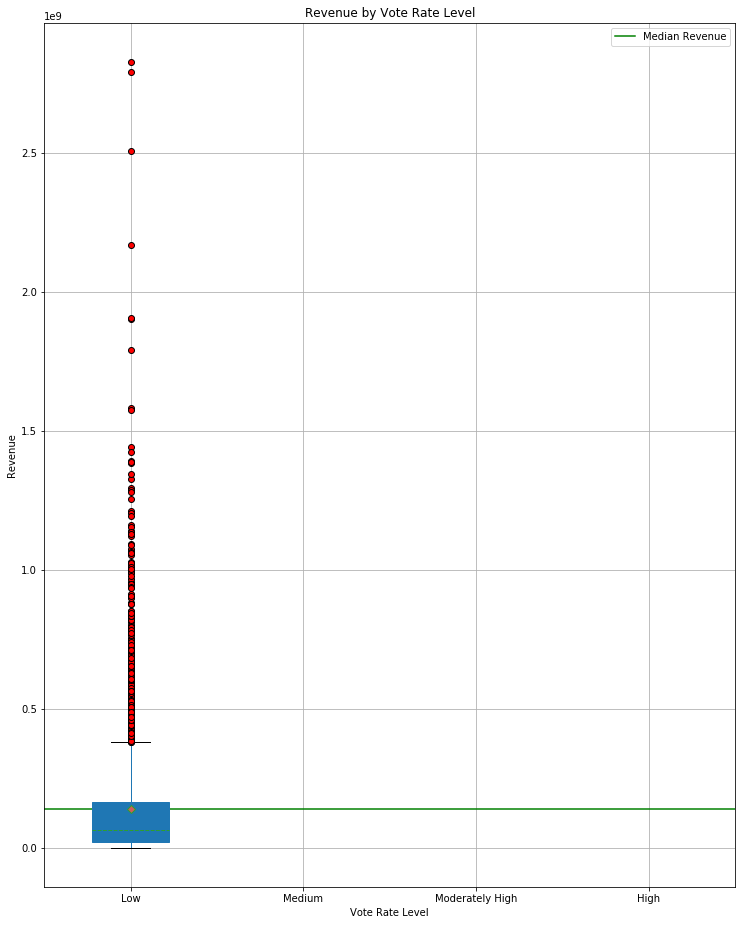

In [381]:
# 按照预算水平来画出每个预算水平组的箱型图
plotBox(movies_genres,'revenue_adj','rate_levels','Vote Rate Level','Revenue','Revenue by Vote Rate Level')

相比于预算和票房的关系，TMDb评分和票房表现的更加有关联性。从散点图中我们发现评分高的电影更有可能获得高的票房，而低评分的电影通常都不会获得高评分。这和我们在箱型图中的关系相符，当评分低于4分时，没有电影获得高票房（高于票房的中位值），而当评价大于4分时，开始有电影获得高票房。当评分高于7分时大部分的票房都获得了高票房。

### 电影类型与票房之间的关系

In [382]:
genres_revenue = pd.DataFrame(np.zeros((1,len(all_genres))),columns=all_genres)
# 按照为分割的电影类别将相应的列中的值变为1
for genres_elm in all_genres :
    genres_revenue.loc[0,genres_elm] = movies_genres.groupby(genres_elm ,as_index=False).mean()['revenue_adj'].iloc[1]

genres_revenue = genres_revenue.sort_values(genres_revenue.last_valid_index(), axis=1)
genres_revenue = genres_revenue.transpose()
genres_revenue.head()

,0
Foreign,1.273378e+07
Documentary,2.480617e+07
TV Movie,5.838910e+07
Horror,8.140656e+07
Drama,1.013785e+08


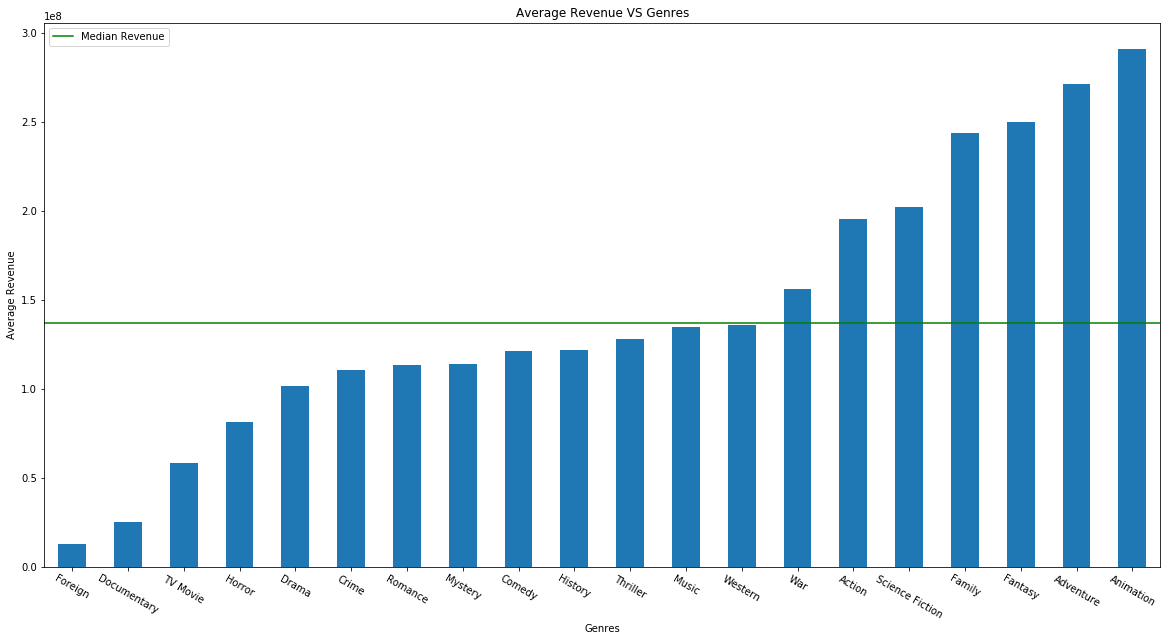

In [383]:
ax3 = genres_revenue.plot.bar(figsize=(20,10),rot = -30,legend=False)
ax3.set_xlabel('Genres')
ax3.set_ylabel('Average Revenue')
ax3.set_title('Average Revenue VS Genres')
green_line = mlines.Line2D([], [], color=revenue_median_fig['color'], label=revenue_median_fig['label'])
plt.axhline(y= revenue_median_fig['value'],color=revenue_median_fig['color'],label=revenue_median_fig['label'])
plt.legend(handles=[green_line],loc =2)

从这里我们可以看到动画类(Animation), 探险类(Adventure)，奇幻类（Fantasy）和家庭类（Family）的电影的平均票房是排在前四名的，第五名科幻类（Science Fiction）的平均票房与前四类电影有一个加大的间隙，而外语类（Foreign），纪录片类（Documentary）和电视衍生类（TV Movie）是平均票房最低的三个类别。

<a id='conclusions'></a>
## 结论

现在我们从三个方面探索了高票房电影的特点，分别是预算与票房的关系，TMDb评分与票房的关系以及电影类别与评分的关系。
1. 预算与票房的关系： 单方面从预算角度考虑，在不考虑其他因素的情况下，预算和票房没有明显的相关性。但是在对预算分级后，我们发现随着电影预算的增高，电影更有可能获得高票房。同时从箱型图和散点图中，我们也发现了在不同的预算等级中，电影票房的下限是相同的，换句话说任何预算等级中的电影依然有可能获得很低的票房。
2. TMDb评分与票房的关系： 单方面从TMDb评分角度研究，评分和票房也没有明显的相关系。但是相比于预算，不同段位的评分对电影有可能获得的票房是有正向的影响的。随着电影的评分提高，它获得高票房的可能性就越大。这个结论在箱型图中也获得了体现，低于4分的电影从来都没有获得过高票房，而大部分评论大于7的电影都获得了高票房。
3. 当探索平均票房与电影分类的关系时，我们发现动画类（Animation），探险类（Adventure），奇幻类（Fantasy），家庭类（Family），科幻类（Science Fiction）和动作类（Action）电影通常更容易获得高票房。

最后还需要指出由于篇幅和数据量有限，我们所作出的结论只是基于一至两个因素的探索，还没有考虑更多不同因素之间的影响。比如：对于不同的电影类别和不同的导演，预算和票房是否会有更强的关系， 对于电影类别，不同电影类别的组合时对票房是正向的影响还是负面的影响。因此上面的结论仅仅是基于我们对数据1个方面的探索。

In [384]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295